# Time Series Forecasting by Nikhil Dasari

## Part One - Baseline models

**Time Series Analysis** - the process of understanding, modeling and forecasting data over time.

## Data - Daily Temperatures n Melbourne - free kaggle dataset

In [237]:
import polars as pl
import pandas as pd

In [238]:
melbourne = pd.read_csv('input/daily-minimum-temperatures-in-me.csv')

In [239]:
melbourne = melbourne[['Date', "Daily minimum temperatures in Melbourne, Australia, 1981-1990"]]

In [240]:
melbourne

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


### Baseline models

_Baseline models_ are usually good enough for most business use cases, and even when they are not, they are a good benchmark for the performance fo more sophisticated time series models

### Three essential baseline models

1. Naive Forecast - Assumes next value is the same as the previous one
2. Seasonal Naive Forecast - Assumes value will repeat from the same point last season
3. Moving average - Takes average of last _n_ points

## Three Components of a time-series analysis

1. Trend - overall direction of data
2. Seasonality - patterns that repeat at regular intervals
3. Residuals - Noise

## Table of Baseline models and when to use them

| Baseline Model | Description                                 | When to Use                                              |
|----------------|---------------------------------------------|----------------------------------------------------------|
| Naive Forecast | Predicts on last observation                | No trend or seasonality                                  |
| Seasonal Naive | Predicts on last observation of same period | Seasonal pattern                                         |
| Moving Average | Average of last _n_ observations            | Smmoth short term noise - no strong trend or seasonality |
|Drift Method| Extends trend line out to future| consistent linear trend                                  |
|Median Forecast|Median of previous observations as forecast|Data has outliers or is skewed|

In [241]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [242]:
print(melbourne.dtypes)

Date                                                              object
Daily minimum temperatures in Melbourne, Australia, 1981-1990    float64
dtype: object


In [243]:
melbourne['date'] = pd.to_datetime(melbourne['Date'], dayfirst=True, format='%Y-%m-%d')
melbourne.set_index('date', inplace=True)
melbourne = melbourne.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'temp'})

In [244]:
melbourne = melbourne.asfreq('D')

In [245]:
melbourne['temp'].fillna(method='ffill', inplace=True)

/var/folders/72/0vr39hh923l283zqx_k35mr40000gn/T/ipykernel_2397/1701839263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  melbourne['temp'].fillna(method='ffill', inplace=True)
/var/folders/72/0vr39hh923l283zqx_k35mr40000gn/T/ipykernel_2397/1701839263.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  melbourne['temp'].fillna(method='ffill', inplace=True)


In [246]:
decompposition = seasonal_decompose(melbourne['temp'], model='additive', period=365)


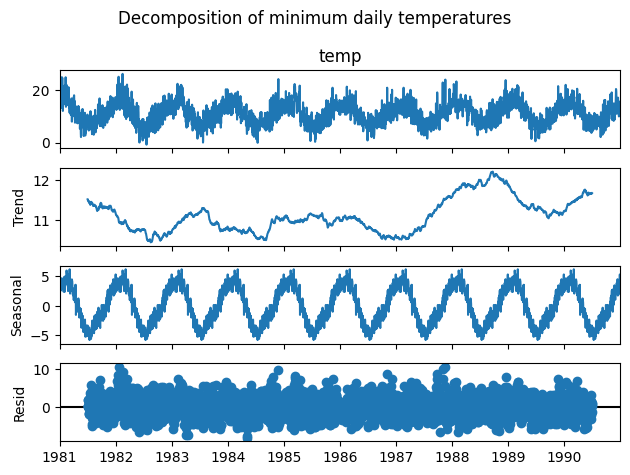

In [247]:
decompposition.plot()
plt.suptitle('Decomposition of minimum daily temperatures')
plt.tight_layout()
plt.show()

The above is an _additive model_ for seasonality decomposition. The _additive model_ treats any give value, _Y_, as the result Y = T + S + R, where _T_, _S_, and _R_ represent _trend_, _seasonality_ and _resdiual_ respectively.

The _additive model_ is preferable when the seasonality seems to be independent of trend

The _multiplicative model_ is often used when seasonality _scales with trend_

For example - if a home's electrical usage is 20% higher in summer -- this means that a change in the trend (base electrical usage) will effect the seasonality

In [248]:
seasonal_period = 365
melbourne['Seasonal_Naive'] = melbourne['temp'].shift(seasonal_period)

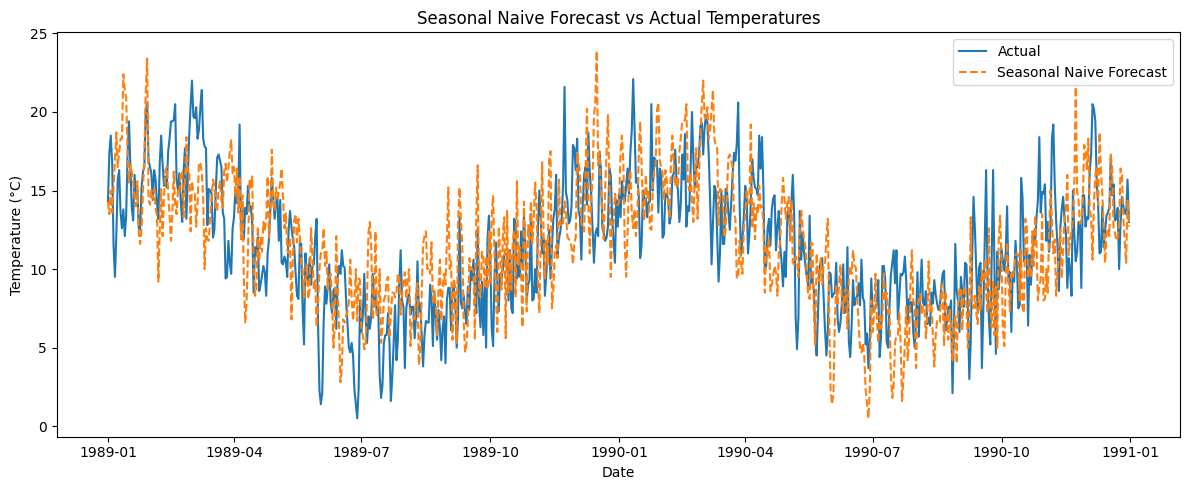

In [249]:
plt.figure(figsize=(12, 5))
plt.plot(melbourne['temp'][-730:], label='Actual')
plt.plot(melbourne['Seasonal_Naive'][-730:], label='Seasonal Naive Forecast', linestyle='--')
plt.title('Seasonal Naive Forecast vs Actual Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

The seasonal naive model does well with the _general shape_ of the prediction, because it is decently capturing the _seasonality_ of the model based on prior year data.

The individual variations are high because the model does not adjust it's prediction based upon either _trend_ or _residual_

### MAPE - Mean Absolute Percentage Error

- Measeures the _mean absolute distance between predicted and actual values_
- We usually want to apply our MAPE score to only the _most recent target time period_



In [250]:
last_year_melbourne = melbourne[['temp', 'Seasonal_Naive']].iloc[-365:].copy()
last_year_melbourne.dropna(inplace=True)

In [251]:
import numpy as np

mape = np.mean(np.abs((last_year_melbourne['temp'] - last_year_melbourne['Seasonal_Naive']) / last_year_melbourne['temp'])) * 100
mape

np.float64(28.23133039443585)

Any model we build should be able to beat the naive model of 28.23% error on the predicted vs actual or it's not a good enough model to use.

### Unpacking trend and seasonality

In [252]:
melbourne_slice = melbourne[['Date', 'temp']][:14]
melbourne_slice

,Date,temp
date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8
1981-01-06,1981-01-06,15.8
1981-01-07,1981-01-07,15.8
1981-01-08,1981-01-08,17.4
1981-01-09,1981-01-09,21.8


To start to see trend with this sample, let's calculate a _three day centered moving average_ (average of value with value before and after)

In [253]:
trend_slice = np.array(melbourne_slice['temp'])
trend_slice

array([20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20. , 16.2,
       13.3, 16.7, 21.5])

In [254]:
central_average = []
for x in range(len(trend_slice)):
    if x not in [0, 13]:
        print(trend_slice[x-1:x+2])
        trend_val = (trend_slice[x-1] + trend_slice[x] + trend_slice[x+1])/3
        central_average.append(trend_val)

central_average


[20.7 17.9 18.8]
[17.9 18.8 14.6]
[18.8 14.6 15.8]
[14.6 15.8 15.8]
[15.8 15.8 15.8]
[15.8 15.8 17.4]
[15.8 17.4 21.8]
[17.4 21.8 20. ]
[21.8 20.  16.2]
[20.  16.2 13.3]
[16.2 13.3 16.7]
[13.3 16.7 21.5]


[np.float64(19.13333333333333),
 np.float64(17.1),
 np.float64(16.400000000000002),
 np.float64(15.4),
 np.float64(15.800000000000002),
 np.float64(16.333333333333332),
 np.float64(18.333333333333332),
 np.float64(19.733333333333334),
 np.float64(19.333333333333332),
 np.float64(16.5),
 np.float64(15.4),
 np.float64(17.166666666666668)]

The above is a small sample, so no trend really jumps out, but when you use the statsmodels built-in seasonal decomposition function, it is doing this over the whole sample and you can see the trend line really grow at the end of the output

### Finding seasonality

Remember our additive time series composition formula:

Observed = Trend + Seasonality + Residual

So if we want to find a __de-trended__ observation, one that leaves only seasonality and noise, we can do some simple algebra here.

Observed - Trend = Seasonality + Residual


In [255]:
central_average = [None] + central_average
central_average.append(None)
melbourne_slice['trend'] = central_average

In [256]:
melbourne_slice

,Date,temp,trend
date,,,
1981-01-01,1981-01-01,20.7,NaN
1981-01-02,1981-01-02,17.9,19.133333
1981-01-03,1981-01-03,18.8,17.100000
1981-01-04,1981-01-04,14.6,16.400000
1981-01-05,1981-01-05,15.8,15.400000
1981-01-06,1981-01-06,15.8,15.800000
1981-01-07,1981-01-07,15.8,16.333333
1981-01-08,1981-01-08,17.4,18.333333
1981-01-09,1981-01-09,21.8,19.733333


In [257]:
melbourne_slice['de_trended'] = (melbourne_slice['temp'] - melbourne_slice['trend']).round(1)
melbourne_slice

,Date,temp,trend,de_trended
date,,,,
1981-01-01,1981-01-01,20.7,NaN,NaN
1981-01-02,1981-01-02,17.9,19.133333,-1.2
1981-01-03,1981-01-03,18.8,17.100000,1.7
1981-01-04,1981-01-04,14.6,16.400000,-1.8
1981-01-05,1981-01-05,15.8,15.400000,0.4
1981-01-06,1981-01-06,15.8,15.800000,-0.0
1981-01-07,1981-01-07,15.8,16.333333,-0.5
1981-01-08,1981-01-08,17.4,18.333333,-0.9
1981-01-09,1981-01-09,21.8,19.733333,2.1


Now that we have our _de-trended_ temperatures, we are ready to examine any seasonal patterns. We will look at the days of the week in our 14 case sample to see what we can find.


In [258]:
day_index = [x for x in range(1, 8)]
day_index += day_index
day_index

[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7]

In [259]:
melbourne_slice['day_index'] = day_index

In [260]:
melbourne_slice

,Date,temp,trend,de_trended,day_index
date,,,,,
1981-01-01,1981-01-01,20.7,NaN,NaN,1
1981-01-02,1981-01-02,17.9,19.133333,-1.2,2
1981-01-03,1981-01-03,18.8,17.100000,1.7,3
1981-01-04,1981-01-04,14.6,16.400000,-1.8,4
1981-01-05,1981-01-05,15.8,15.400000,0.4,5
1981-01-06,1981-01-06,15.8,15.800000,-0.0,6
1981-01-07,1981-01-07,15.8,16.333333,-0.5,7
1981-01-08,1981-01-08,17.4,18.333333,-0.9,1
1981-01-09,1981-01-09,21.8,19.733333,2.1,2


In [261]:
melbourne_seasonality = melbourne_slice.groupby('day_index')['de_trended'].mean().round(2)
melbourne_seasonality = melbourne_seasonality.rename('seasonality')
melbourne_slice = melbourne_slice.join(melbourne_seasonality, how='left', on='day_index')
melbourne_slice

,Date,temp,trend,de_trended,day_index,seasonality
date,,,,,,
1981-01-01,1981-01-01,20.7,NaN,NaN,1,-0.90
1981-01-02,1981-01-02,17.9,19.133333,-1.2,2,0.45
1981-01-03,1981-01-03,18.8,17.100000,1.7,3,1.20
1981-01-04,1981-01-04,14.6,16.400000,-1.8,4,-1.05
1981-01-05,1981-01-05,15.8,15.400000,0.4,5,-0.85
1981-01-06,1981-01-06,15.8,15.800000,-0.0,6,-0.25
1981-01-07,1981-01-07,15.8,16.333333,-0.5,7,-0.50
1981-01-08,1981-01-08,17.4,18.333333,-0.9,1,-0.90
1981-01-09,1981-01-09,21.8,19.733333,2.1,2,0.45


So, if we look at the seasonality result for day 2, for example. The value of .45 means that the temperature for day 2 tends to be .45 degrees celsius _higher than the trend for that specific predicted day_

### Finding the residual

Now we can calculate the residual by further moving our additive equation:

Observed - Trend - Seasonality = Residual

In [262]:
melbourne_slice['residual'] = (melbourne_slice['temp'] - melbourne_slice['trend'] - melbourne_slice['seasonality']).round(2)
melbourne_slice

,Date,temp,trend,de_trended,day_index,seasonality,residual
date,,,,,,,
1981-01-01,1981-01-01,20.7,NaN,NaN,1,-0.90,NaN
1981-01-02,1981-01-02,17.9,19.133333,-1.2,2,0.45,-1.68
1981-01-03,1981-01-03,18.8,17.100000,1.7,3,1.20,0.50
1981-01-04,1981-01-04,14.6,16.400000,-1.8,4,-1.05,-0.75
1981-01-05,1981-01-05,15.8,15.400000,0.4,5,-0.85,1.25
1981-01-06,1981-01-06,15.8,15.800000,-0.0,6,-0.25,0.25
1981-01-07,1981-01-07,15.8,16.333333,-0.5,7,-0.50,-0.03
1981-01-08,1981-01-08,17.4,18.333333,-0.9,1,-0.90,-0.03
1981-01-09,1981-01-09,21.8,19.733333,2.1,2,0.45,1.62


### Building a model for Trend and Seasonality

The prior model took seasonality into account. Now the goal is to build a model that takes trend and seasonality into account to see if we need a more sophisticated model to handle the residuals or not

In [263]:
train = melbourne[melbourne.index.year < melbourne.index.year.max()]
test = melbourne[melbourne.index.year == melbourne.index.year.max()]


In [264]:
decomposition = seasonal_decompose(train['temp'], model='additive', period=365)
trend = decompposition.trend
seasonal = decomposition.seasonal


Get the last 365 days of the seasonal values from the training data

In [265]:
seasonal_values = seasonal[-365:].values
seasonal_test = pd.Series(seasonal_values[:len(test)], index=test.index)

Get the last trend number and extend it over the entire last test year

In [266]:
trend_last = trend.dropna().iloc[-1]
trend_test = pd.Series(trend_last, index=test.index)


### Create a baseline forecast from trend and seasonality together

In [267]:
baseline_forecast = trend_test + seasonal_test

Now check the __MAPE__ for our forecast, comparing test baseline to test actual

In [268]:
from sklearn.metrics import mean_absolute_percentage_error

actual = test['temp']
mask = actual > 1e-3
mape = mean_absolute_percentage_error(actual[mask], baseline_forecast[mask])
print(f'Mean Absolute Percentage Error For Final Test Data Year: {mape: .2%}')

Mean Absolute Percentage Error For Final Test Data Year:  21.70%


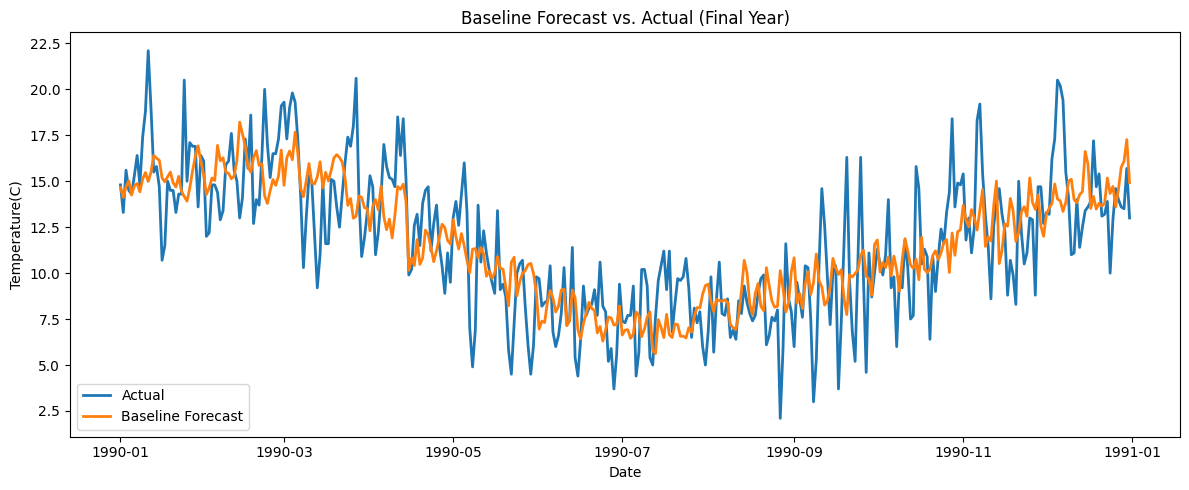

In [269]:
plt.figure(figsize=(12, 5))
plt.plot(actual.index, actual, label='Actual', linewidth=2)
plt.plot(actual.index, baseline_forecast, label='Baseline Forecast', linewidth=2)
plt.title('Baseline Forecast vs. Actual (Final Year)')
plt.xlabel('Date')
plt.ylabel('Temperature(C)')
plt.legend()
plt.tight_layout()
plt.show()

### Reviewing our Standard Decomposition-Based Baseline

This model is 7% more accurate than the model that simply baselined seasonality alone
Instead of over-predicting, we seem to be more systematically under-predicting

What might improve our model? __Customizing the baseline__ - we do this by trying to fit the baseline to patterns we can observe in the data

In [271]:
train['month'] = train.index.month
train['day'] = train.index.day
test['month'] = test.index.month
test['day'] = test.index.day

calendar_day_avg = train.groupby(['month', 'day'])['temp'].mean()
calendar_day_avg

/var/folders/72/0vr39hh923l283zqx_k35mr40000gn/T/ipykernel_2397/1418525396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month
/var/folders/72/0vr39hh923l283zqx_k35mr40000gn/T/ipykernel_2397/1418525396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day'] = train.index.day
/var/folders/72/0vr39hh923l283zqx_k35mr40000gn/T/ipykernel_2397/1418525396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

month  day
1      1      15.966667
       2      15.500000
       3      14.588889
       4      13.988889
       5      13.800000
                ...    
12     27     13.911111
       28     13.011111
       29     14.244444
       30     15.500000
       31     15.911111
Name: temp, Length: 366, dtype: float64

In [272]:
calendar_day_forecast = test.apply(lambda row: calendar_day_avg.get((row['month'], row['day']), np.nan), axis=1)
calendar_day_forecast

date
1990-01-01    15.966667
1990-01-02    15.500000
1990-01-03    14.588889
1990-01-04    13.988889
1990-01-05    13.800000
                ...    
1990-12-27    13.911111
1990-12-28    13.011111
1990-12-29    14.244444
1990-12-30    15.500000
1990-12-31    15.911111
Freq: D, Length: 365, dtype: float64

In [273]:
mape_calendar_day = mean_absolute_percentage_error(test['temp'], calendar_day_forecast)
mape_calendar_day

0.21095457408174065

The above model is not much better. We can play around with the model for our forecast though. If we base the model 70% on the calendar average and 30% on the previous day temperature, maybe this will improve things.

In [274]:
melbourne['prev_temp'] = melbourne['temp'].shift(1)
test['prev_temp'] = melbourne.loc[test.index, 'prev_temp']
test

/var/folders/72/0vr39hh923l283zqx_k35mr40000gn/T/ipykernel_2397/476850386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prev_temp'] = melbourne.loc[test.index, 'prev_temp']


,Date,temp,Seasonal_Naive,month,day,prev_temp
date,,,,,,
1990-01-01,1990-01-01,14.8,14.3,1,1,12.7
1990-01-02,1990-01-02,13.3,17.4,1,2,14.8
1990-01-03,1990-01-03,15.6,18.5,1,3,13.3
1990-01-04,1990-01-04,14.5,16.8,1,4,15.6
1990-01-05,1990-01-05,14.3,11.5,1,5,14.5
...,...,...,...,...,...,...
1990-12-27,1990-12-27,14.0,13.3,12,27,14.6
1990-12-28,1990-12-28,13.6,11.7,12,28,14.0
1990-12-29,1990-12-29,13.5,10.4,12,29,13.6


In [275]:
blended_forecast = 0.7 * calendar_day_forecast.values + 0.3 * test['prev_temp'].values

# missing values handler
blended_forecast = np.nan_to_num(blended_forecast, nan=np.nanmean(calendar_day_forecast))

mape_blended = mean_absolute_percentage_error(test['temp'], blended_forecast)
mape_blended

0.18739213951277076